In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # Import Modules

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
!git clone https://github.com/VinAIResearch/PhoNER_COVID19.git

Cloning into 'PhoNER_COVID19'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 58 (delta 23), reused 41 (delta 18), pack-reused 0
Unpacking objects: 100% (58/58), done.


#: Load bộ dữ liệu 





In [4]:
train_data = pd.read_json('/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/train_word.json', lines=True)
dev_data = pd.read_json('/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/dev_word.json', lines=True)
test_data = pd.read_json('/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/test_word.json', lines=True)

In [5]:
train_data = train_data.fillna(method='ffill')
dev_data = dev_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

# Pre-processing


In [6]:
def processing_data(data):
  flat_word = [item for sentence in data['words'] for item in sentence]
  flat_tag = [item for sentence in data['tags'] for item in sentence]
  sentence = []
  for i in range(len(data)):
    for j in range(len(data.iloc[i]['words'])):
        sentence.append("Sentence: "+ str(i+1))

  df = pd.DataFrame(columns=['Sentence #','Word','Tag'])
  df['Sentence #'] = sentence
  df['Word'] = flat_word
  df['Tag'] = flat_tag

  return df

In [7]:
train = processing_data(train_data)
dev = processing_data(dev_data)
test = processing_data(test_data) 

# Word corpus create

In [8]:
corpus = [train['Word'].values.tolist(), dev['Word'].values.tolist(), test['Word'].values.tolist()]
corpus = sum(corpus, [])
corpus[3]

'tiếp_tục'

In [9]:
#tạo tập từ vựng
words = list(set(corpus))
words.append("ENDPAD")
num_words = len(words)

In [10]:
#tạo tập nhãn 
tags = list(set(train["Tag"].values))
num_tags = len(tags)


# Get the sentences and the corresponding cards

In [11]:
def get_sentences(data):
  agg = lambda s: [(w,t) for w, t in zip(s["Word"].values.tolist(),
                                         s["Tag"].values.tolist())]
  group = data.groupby('Sentence #').apply(agg)
  return [sen for sen in group]

In [12]:
sentences = get_sentences(train)

In [13]:
sentences[0]

[('Đồng_thời', 'O'),
 (',', 'O'),
 ('bệnh_viện', 'O'),
 ('tiếp_tục', 'O'),
 ('thực_hiện', 'O'),
 ('các', 'O'),
 ('biện_pháp', 'O'),
 ('phòng_chống', 'O'),
 ('dịch_bệnh', 'O'),
 ('COVID', 'O'),
 ('-', 'O'),
 ('19', 'O'),
 ('theo', 'O'),
 ('hướng_dẫn', 'O'),
 ('của', 'O'),
 ('Bộ', 'B-ORGANIZATION'),
 ('Y_tế', 'I-ORGANIZATION'),
 ('.', 'O')]

# Bước 4: Ánh xạ giữa các câu và chỉ mục
Chúng ta có thể thấy rằng mỗi từ được gán cho một thẻ duy nhất. Chúng tôi có thể truy xuất những từ này bằng cách sử dụng các chỉ số của chúng và tra cứu chúng trong từ điển và trả về các khóa tương ứng.


In [14]:
word2idx = {w: i   for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [15]:
# word2idx
word2idx["ENDPAD"]


8101

In [16]:
tag2idx

{'B-LOCATION': 0,
 'I-JOB': 1,
 'B-PATIENT_ID': 2,
 'B-AGE': 3,
 'I-PATIENT_ID': 4,
 'I-LOCATION': 5,
 'B-ORGANIZATION': 6,
 'O': 7,
 'B-JOB': 8,
 'B-GENDER': 9,
 'I-TRANSPORTATION': 10,
 'B-TRANSPORTATION': 11,
 'I-DATE': 12,
 'I-NAME': 13,
 'I-SYMPTOM_AND_DISEASE': 14,
 'B-NAME': 15,
 'I-ORGANIZATION': 16,
 'B-DATE': 17,
 'B-SYMPTOM_AND_DISEASE': 18,
 'I-AGE': 19}

# Visualizing

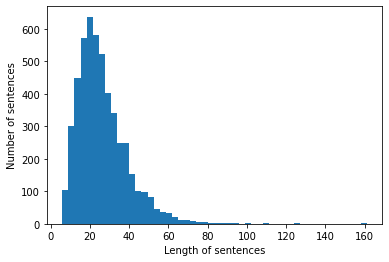

In [17]:
#vẽ biểu đồ thể hiện phân bố chiều dài của câu trong tập dữ liệu.
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('Length of sentences')
plt.ylabel('Number of sentences')
plt.show()

In [18]:
#ánh xạ từ trong câu và nhãn về index của nó
from tensorflow.keras.preprocessing.sequence import pad_sequences
#đặt max length cho phù hợp
max_len = 95
 
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)
#tương tự với nhãn
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding='post', value=tag2idx["O"])


In [19]:
print(X[0])
print(y[0])

[4050 7844  927 4910  830  190 5206 3832  775 4069  391 5265 5408 7505
 5851 5995 4768 3466 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101
 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101 8101]
[ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  6 16  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7]


- test_size = 0.2 có nghĩa là 80% dữ liệu chia cho tập huấn luyện và 20% còn lại cho tập kiểm tra.

In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Bước 6: Xây dựng Mô hình LSTM hai chiều (bi-LSTM)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

Bản tóm tắt cho thấy rằng chúng ta có hơn 1,8 triệu tham số cần được huấn luyện.

In [22]:
model = Sequential()

#Input
model.add(Input(shape=(max_len,)))

#Embedding
model.add(Embedding(input_dim=num_words, input_length=max_len, output_dim=max_len))

#SpatialDropout1D
model.add(SpatialDropout1D(0.1))

#LSTM
model.add(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5))

#TimeDistributed
model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 95, 95)            769690    
                                                                 
 spatial_dropout1d (SpatialD  (None, 95, 95)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 95, 100)           78400     
                                                                 
 time_distributed (TimeDistr  (None, 95, 20)           2020      
 ibuted)                                                         
                                                                 
Total params: 850,110
Trainable params: 850,110
Non-trainable params: 0
_________________________________________________________________


- Sử dụng trình tối ưu hoá "adam"
- sparce_categorical_crossentropy làm hàm mất mát
- Ma trận mà chúng ta sẽ quan tâm là ma trận độ chính xác.

In [23]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#Bước7: Huấn luyện Model

- Để bắt đầu huấn luyện là gọi model.fit ()
- Có thể tăng kích thước batch_size nếu bạn có GPU có kích thước bộ nhớ lớn.



In [25]:
# Các bạn nhớ là phải lưu mô hình khi train (có nhắc lại yêu cầu ở cuối) 
import time
start_time = time.time()

history = model.fit(
    x=x_train,
    y=y_train,
    # validation_data=(x_valid,y_valid),
    validation_split= 0.1,
    batch_size= 32, 
    epochs=1,
    verbose=1
)
print("[{}] Completed!".format(time.time() - start_time))

114/114 [==============================] - 24s 208ms/step - loss: 0.1785 - accuracy: 0.9542 - val_loss: 0.1538 - val_accuracy: 0.9583
[24.019193410873413] Completed!


# Bước8: Đánh giá mô hình NER



In [26]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 1s 38ms/step - loss: 0.1522 - accuracy: 0.9588


[0.15220414102077484, 0.958846926689148]

- Dự đoán

In [27]:
# i = np.random.randint(0, x_test.shape[0]) #659
#print(x_test[1])
i =99
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 359ms/step
Word           True 	 Pred

------------------------------
bao_gồm        O	O
đó             O	O
Đêm            O	O
7/3            O	O
Yên_Ninh       O	O
1077           O	O
ICU            O	O
tự_do          O	O
luồng          O	O
Hà_Tĩnh        B-LOCATION	B-LOCATION
nhân_tạo       O	O
69             B-LOCATION	B-LOCATION
lầu            O	O
06h22          B-LOCATION	O
nhân_tạo       O	O
dọc            B-LOCATION	B-LOCATION
chơi           O	O
Phúc_La        O	O
Việt           O	O
nCoVđể         O	O
gout           O	O
nhận_biết      O	O
tạm            O	O
A9             O	O
hôm_qua        O	O
Nguyễn_Văn_KínhO	O
trăm           O	O
Dương_Bá_Trạc  O	O
cả             O	O
hàng_đầu       O	O
Phúc_La        O	O
Việt           O	O
412            O	O
Yên_Ninh       O	O
Nihon_Plast    O	O
Nguyễn_Phương_AnhO	O
5.100          O	O
lo_lắng        O	O
A9             O	O
con_cái        O	O
thú_y          O	O
Điều_dưỡng     O	O
L.ANH          O	O
Thượng

In [38]:
# hoàn thành yêu cầu trong file thực hành tương ứng cho câu 1 và 2.
predict = np.argmax(model.predict(np.array(x_test)), axis=-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), predict.ravel())

32/32 [==============================] - 3s 81ms/step


0.9588469184890656

In [39]:
from sklearn.metrics import  f1_score
print("F1-score (macro): {} ".format(f1_score(y_test.ravel(), predict.ravel(), average = 'macro')))
print("F1-score (micro): {} ".format(f1_score(y_test.ravel(), predict.ravel(), average = 'micro')))

F1-score (macro): 0.11736124947088476 
F1-score (micro): 0.9588469184890656 


In [40]:
from sklearn.metrics import classification_report

idx2tag = {i: t for i, t in enumerate(tags)}
print(classification_report(y_test.ravel(), predict.ravel(),labels=list(idx2tag.keys()),target_names=list(idx2tag.values())))

                       precision    recall  f1-score   support

           B-LOCATION       0.46      0.77      0.57      1024
                I-JOB       0.00      0.00      0.00         4
         B-PATIENT_ID       0.73      0.01      0.03       608
                B-AGE       0.00      0.00      0.00       135
         I-PATIENT_ID       0.00      0.00      0.00         3
           I-LOCATION       0.47      0.83      0.60      1016
       B-ORGANIZATION       0.00      0.00      0.00       224
                    O       0.98      1.00      0.99     90229
                B-JOB       0.00      0.00      0.00        39
             B-GENDER       0.00      0.00      0.00        98
     I-TRANSPORTATION       0.00      0.00      0.00        17
     B-TRANSPORTATION       0.00      0.00      0.00        39
               I-DATE       0.14      0.00      0.00       424
               I-NAME       0.00      0.00      0.00         5
I-SYMPTOM_AND_DISEASE       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

# Lưu model

Các bạn lưu lại model đã lưu và bộ trong số model

In [41]:
from keras.models import save_model
save_model(model, filepath='/content/drive/MyDrive/Ds310/Buổi 2/LSMT_cau_2_BTTH2.h5')